# genearating the urls for all seasons from 2011/2012 till now

In [1]:
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2022,2023,2024]
urls = []
for i in range(len(years)-1):
    season = f'{years[i]}-{years[i+1]}'
    url = f'https://fbref.com/en/comps/9/{season}/schedule/{season}-Premier-League-Scores-and-Fixtures'
    urls.append(url)
urls

['https://fbref.com/en/comps/9/2011-2012/schedule/2011-2012-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2012-2013/schedule/2012-2013-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2013-2014/schedule/2013-2014-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2014-2015/schedule/2014-2015-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2015-2016/schedule/2015-2016-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2016-2017/schedule/2016-2017-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9/2020-2022/schedule/2020-2022-Premier-League-Scores-and-Fixtures',
 'https://fbref.com/en/comps/9

# Getting the soup for all the urls we have

In [2]:
import requests
from bs4 import BeautifulSoup

soups = []
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    soups.append(soup)

# Preparing the table headers

In [3]:
tables_list = soups[6].find_all("table") 
table_titles = tables_list[0].find_all('th')
table_titles = [title.text for title in table_titles]
table_titles[:14]

['Wk',
 'Day',
 'Date',
 'Time',
 'Home',
 'xG',
 'Score',
 'xG',
 'Away',
 'Attendance',
 'Venue',
 'Referee',
 'Match Report',
 'Notes']

In [4]:
import pandas as pd
#to avoid having two columns with the same name
table_titles[5] = 'home xG'
table_titles[7] = 'away xG'

df = pd.DataFrame(columns= table_titles[1:14])
df

,Day,Date,Time,Home,home xG,Score,away xG,Away,Attendance,Venue,Referee,Match Report,Notes


# Getting the data from the soups into the pandas data frame

In [5]:
for soup in soups:
    tables_list = soup.find_all("table") 
    for table in tables_list:
        table_data = table.find_all('tr')
        for row in table_data[1:]:
            row_data = row.find_all('td')
            individual_row_data = [data.text.strip() for data in row_data]
            if len(individual_row_data) < 13:
                individual_row_data.insert(4 , '')
                individual_row_data.insert(6 , '')
            df.loc[len(df)] = individual_row_data

In [6]:
df.head(10)

,Day,Date,Time,Home,home xG,Score,away xG,Away,Attendance,Venue,Referee,Match Report,Notes
0,Sat,2011-08-13,,QPR,,0–4,,Bolton,"15,195",Kiyan Prince Foundation Stadium,Martin Atkinson,Match Report,
1,Sat,2011-08-13,,Liverpool,,1–1,,Sunderland,"45,018",Anfield,Phil Dowd,Match Report,
2,Sat,2011-08-13,,Wigan Athletic,,1–1,,Norwich City,"17,454",DW Stadium,Stuart Attwell,Match Report,
3,Sat,2011-08-13,,Fulham,,0–0,,Aston Villa,"25,700",Craven Cottage,Lee Mason,Match Report,
4,Sat,2011-08-13,,Newcastle Utd,,0–0,,Arsenal,"46,894",St James' Park,Peter Walton,Match Report,
5,Sat,2011-08-13,,Blackburn,,1–2,,Wolves,"21,996",Ewood Park,Kevin Friend,Match Report,
6,Sun,2011-08-14,,West Brom,,1–2,,Manchester Utd,"25,360",The Hawthorns,Mike Jones,Match Report,
7,Sun,2011-08-14,,Stoke City,,0–0,,Chelsea,"27,421",bet365 Stadium,Mark Halsey,Match Report,
8,Mon,2011-08-15,,Manchester City,,4–0,,Swansea City,"46,802",Etihad Stadium,Mike Dean,Match Report,
9,,,,,,,,,,,,,


# Data cleaning

first checking where is the nulls

In [7]:
df.isna().sum()

Day             0
Date            0
Time            0
Home            0
home xG         0
Score           0
away xG         0
Away            0
Attendance      0
Venue           0
Referee         0
Match Report    0
Notes           0
dtype: int64

In [26]:
df = df[df['Score']!='']

In [9]:
df['home xG'].value_counts()

home xG
       2857
1.3     116
1.0     114
1.4     113
0.9     110
0.8     103
1.5     103
1.2      98
1.7      90
0.7      90
1.1      90
0.6      86
1.8      82
2.2      79
0.5      76
2.4      74
1.6      73
2.1      70
2.3      64
1.9      61
0.4      56
2.0      54
0.3      53
2.6      44
2.8      39
2.9      38
2.7      35
2.5      29
3.1      23
0.2      23
3.3      22
3.2      20
3.0      19
0.1      11
3.5       9
3.4       9
4.0       7
3.6       6
3.8       6
4.2       6
3.7       5
3.9       4
4.1       4
4.5       2
0.0       2
7.0       2
4.7       1
4.8       1
5.9       1
4.4       1
4.3       1
5.2       1
Name: count, dtype: int64

In [10]:
df['Notes'].value_counts()

Notes
    5083
Name: count, dtype: int64

In [12]:
df['Referee'].value_counts()

Referee
                     577
Anthony Taylor       323
Michael Oliver       322
Mike Dean            259
Martin Atkinson      253
Andre Marriner       235
Craig Pawson         214
Kevin Friend         197
Lee Mason            194
Jonathan Moss        167
Paul Tierney         156
Mark Clattenburg     152
Mike Jones           138
Stuart Attwell       138
Chris Kavanagh       115
Lee Probert          111
Simon Hooper          96
Roger East            90
Howard Webb           90
Robert Madley         88
Chris Foy             86
Graham Scott          85
Phil Dowd             81
David Coote           81
Niel Swarbrick        80
Andy Madley           80
Robert Jones          67
John Brooks           61
Jon Moss              56
Jarred Gillett        55
Peter Bankes          52
Neil Swarbrick        49
Tim Robinson          45
Darren England        41
Michael Salisbury     41
Mark Halsey           39
Samuel Barrott        30
Thomas Bramall        28
Tony Harrington       24
Philip Dowd      

In [13]:
df['Match Report'].value_counts()

Match Report
Match Report    4506
                 523
Head-to-Head      54
Name: count, dtype: int64

Dropping the unuseful columns

In [14]:
df.drop(['Match Report' , 'Notes'] , axis = 1 , inplace = True)

# Convert numerical cloumns to numerical data type

In [15]:
df.head()

,Day,Date,Time,Home,home xG,Score,away xG,Away,Attendance,Venue,Referee
0,Sat,2011-08-13,,QPR,,0–4,,Bolton,"15,195",Kiyan Prince Foundation Stadium,Martin Atkinson
1,Sat,2011-08-13,,Liverpool,,1–1,,Sunderland,"45,018",Anfield,Phil Dowd
2,Sat,2011-08-13,,Wigan Athletic,,1–1,,Norwich City,"17,454",DW Stadium,Stuart Attwell
3,Sat,2011-08-13,,Fulham,,0–0,,Aston Villa,"25,700",Craven Cottage,Lee Mason
4,Sat,2011-08-13,,Newcastle Utd,,0–0,,Arsenal,"46,894",St James' Park,Peter Walton


Attendance column

In [19]:
def remove_comma(a):
    if a == '':
        return -1
    return int(a.replace(',' , ''))
df['Attendance'] = df['Attendance'].apply(remove_comma)

In [20]:
df['Attendance'].value_counts()

Attendance
-1        674
 34977     22
 25700     10
 34857      7
 35005      7
         ... 
 38904      1
 31723      1
 51573      1
 75344      1
 17120      1
Name: count, Length: 3625, dtype: int64

Score column

In [35]:
def home_score(a):
    return int(a.split('–')[0])
def away_score(a):
    return int(a.split('–')[1])
df['Home score'] = df['Score'].apply(home_score)
df['Away score'] = df['Score'].apply(away_score)

In [36]:
df.head()

,Day,Date,Time,Home,home xG,Score,away xG,Away,Attendance,Venue,Referee,Home score,Away score
0,Sat,2011-08-13,,QPR,,0–4,,Bolton,15195,Kiyan Prince Foundation Stadium,Martin Atkinson,0,4
1,Sat,2011-08-13,,Liverpool,,1–1,,Sunderland,45018,Anfield,Phil Dowd,1,1
2,Sat,2011-08-13,,Wigan Athletic,,1–1,,Norwich City,17454,DW Stadium,Stuart Attwell,1,1
3,Sat,2011-08-13,,Fulham,,0–0,,Aston Villa,25700,Craven Cottage,Lee Mason,0,0
4,Sat,2011-08-13,,Newcastle Utd,,0–0,,Arsenal,46894,St James' Park,Peter Walton,0,0


In [37]:
df.to_csv('Premier league scores.csv')

# Data analysis

## Q1: What are the 5 stadiums that have hosted the most games?

In [43]:
df['Venue'].value_counts()[:5]

Venue
Goodison Park       227
Etihad Stadium      226
Emirates Stadium    226
Old Trafford        224
Anfield             224
Name: count, dtype: int64

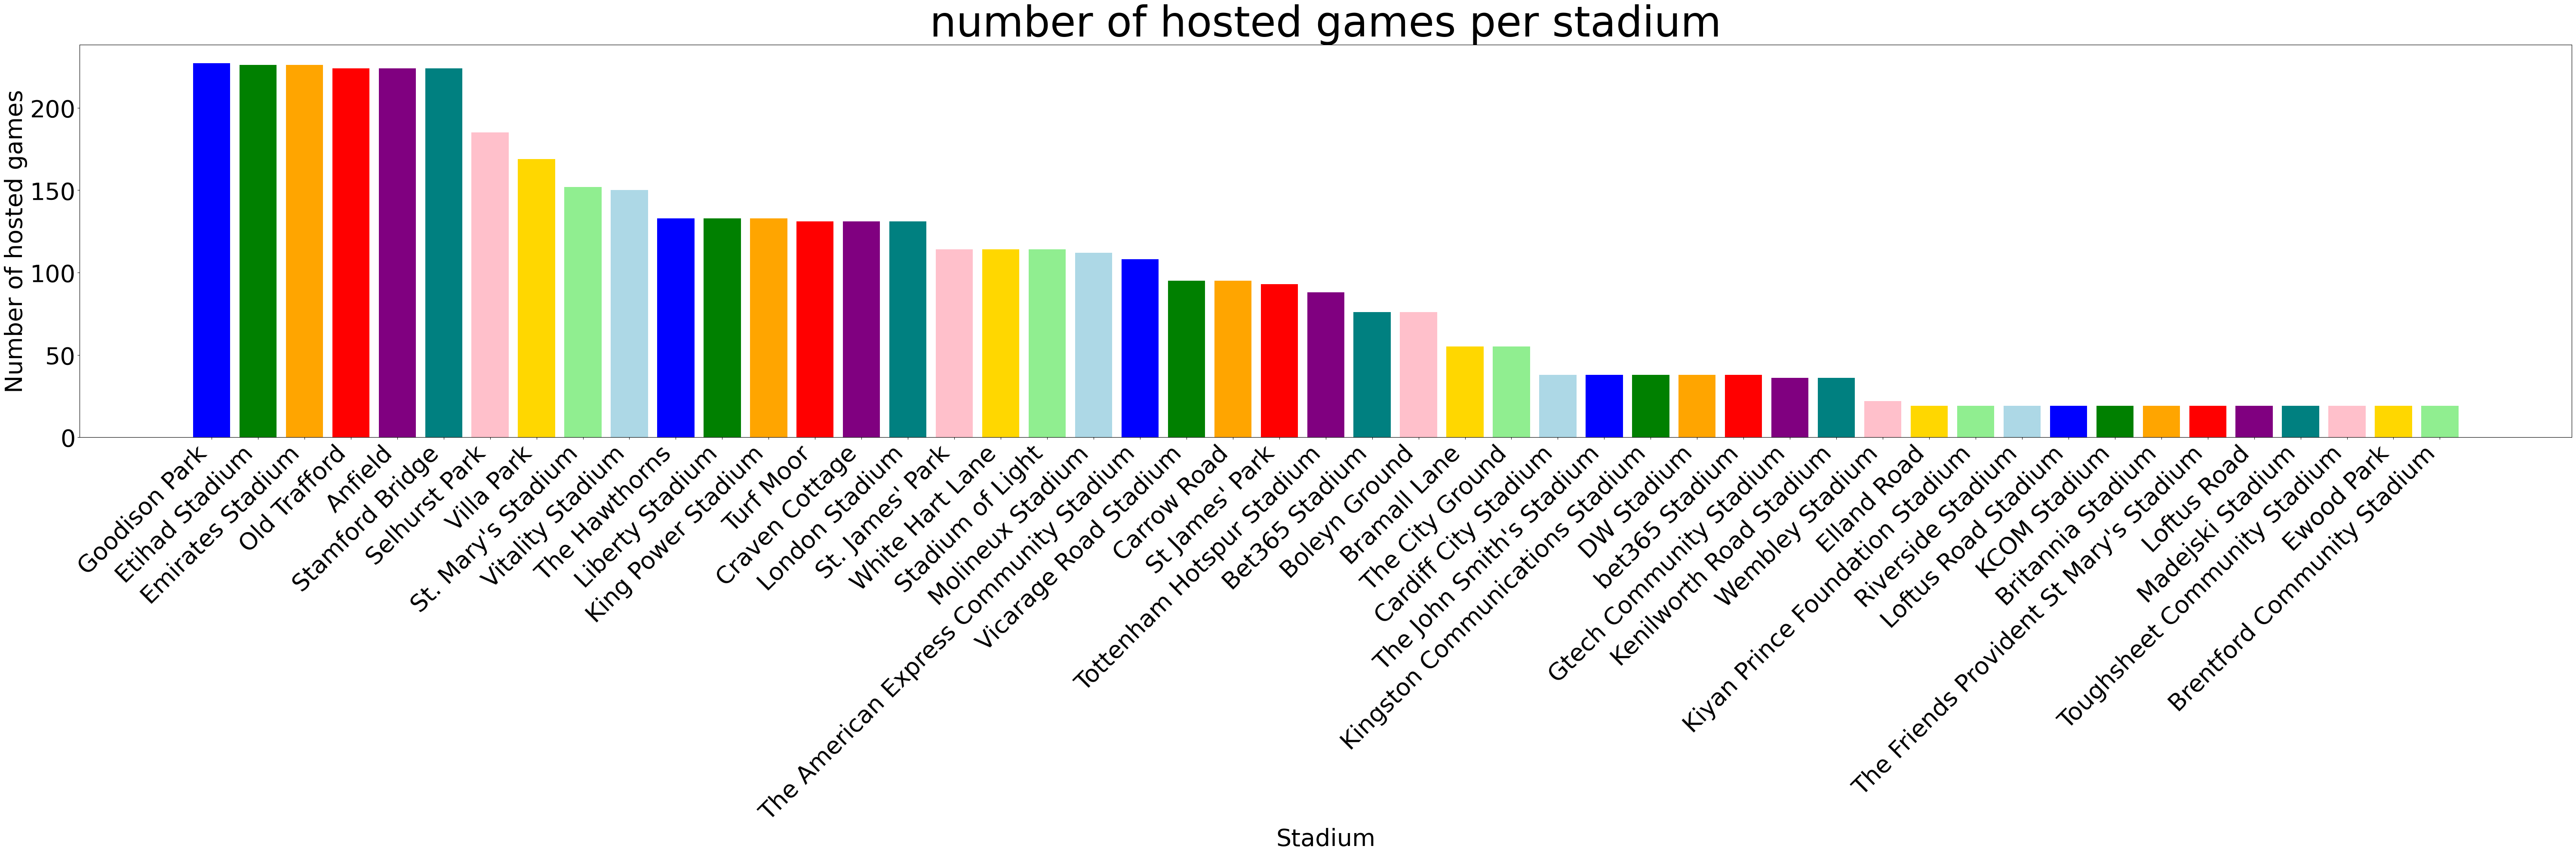

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 20))
plt.bar(df['Venue'].value_counts().index, df['Venue'].value_counts().values, color=['blue', 'green', 'orange', 'red', 'purple', 'teal', 'pink', 'gold', 'lightgreen', 'lightblue'])
plt.xlabel("Stadium", fontsize = 40)
plt.ylabel("Number of hosted games", fontsize = 40)
plt.title("number of hosted games per stadium", fontsize = 70)
plt.xticks(rotation=45, ha="right" , fontsize = 40)
plt.yticks(fontsize = 40)
plt.tight_layout()

plt.show()

## Q2: Which 10 referees have officiated the most games?

In [56]:
df['Referee'].value_counts()[:10]

Referee
Anthony Taylor     323
Michael Oliver     322
Mike Dean          259
Martin Atkinson    253
Andre Marriner     235
Craig Pawson       214
Kevin Friend       197
Lee Mason          194
Jonathan Moss      167
Paul Tierney       156
Name: count, dtype: int64

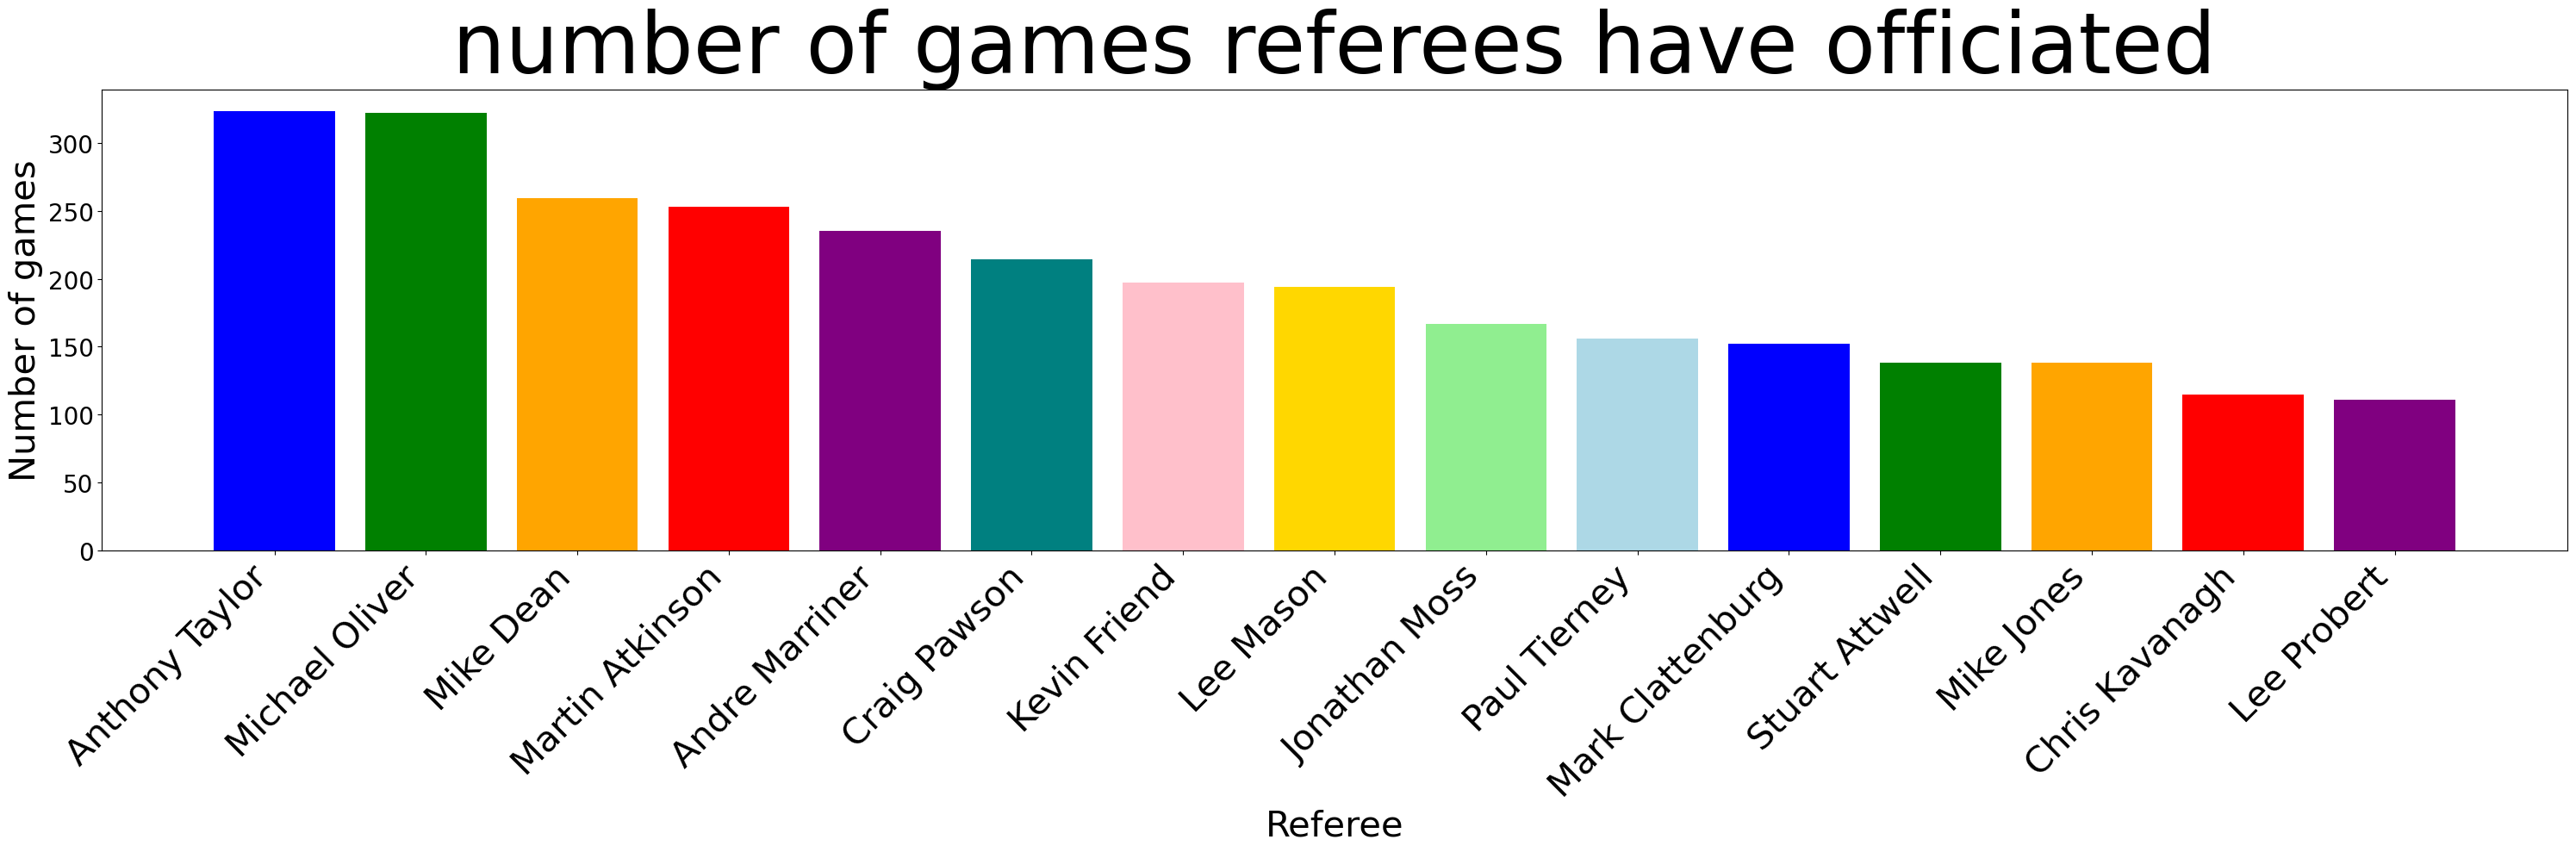

In [121]:
plt.figure(figsize=(30, 10))
plt.bar(df['Referee'].value_counts().index[:15], df['Referee'].value_counts().values[:15], color=['blue', 'green', 'orange', 'red', 'purple', 'teal', 'pink', 'gold', 'lightgreen', 'lightblue'])
plt.xlabel("Referee", fontsize = 30)
plt.ylabel("Number of games", fontsize = 30)
plt.title("number of games referees have officiated", fontsize = 70)
plt.xticks(rotation=45, ha="right" , fontsize = 30)
plt.yticks(fontsize = 20)
plt.tight_layout()

plt.show()

## Q3: Do home teams really have a better shot at winning? 

In [62]:
home_win = len(df[df['Home score'] > df['Away score']])
away_win = len(df[df['Home score'] < df['Away score']])
draw_match = len(df[df['Home score'] == df['Away score']])

print(f'Home wins : {home_win}\nAway wins : {away_win}\nDrawn matches : {draw_match}')

Home wins : 2066
Away wins : 1368
Drawn matches : 1072


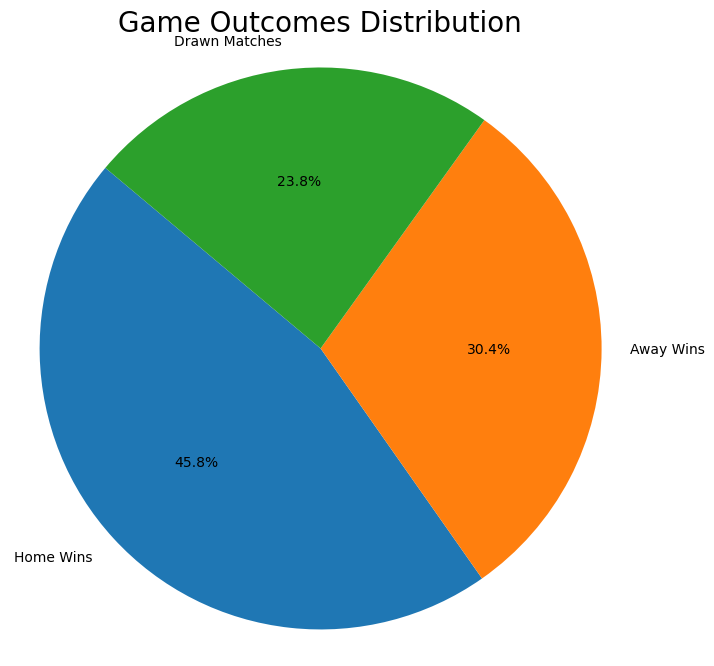

In [68]:
slice_labels = ['Home Wins', 'Away Wins', 'Drawn Matches']

slice_values = [home_win, away_win, draw_match]

plt.figure(figsize=(8, 8))
plt.pie(slice_values, labels=slice_labels, autopct="%1.1f%%", startangle=140)

plt.title("Game Outcomes Distribution", fontsize = 20)

plt.axis('equal')  

plt.show()

## Q4 : How many matches had a score with one team scoring more than 4 goals?

In [73]:
tot = len(df[(df['Home score'] > 4) | (df['Away score'] > 4)])
print(f'Total number of matches : {len(df)}\nTotal number of matches had a score with one team scoring more than 4 goals : {tot} ')

Total number of matches : 4506
Total number of matches had a score with one team scoring more than 4 goals : 198 


## Q5 : The most winning teams ?

In [116]:
winners = pd.DataFrame(columns=['Team', 'Winning score'])

home_winners = df[df['Home score'] > df['Away score']][['Home', 'Home score']]
home_winners.columns = ['Team', 'Winning score'] 

away_winners = df[df['Home score'] < df['Away score']][['Away', 'Away score']]
away_winners.columns = ['Team', 'Winning score']  

winners = pd.concat([home_winners, away_winners], ignore_index=True)
winners

,Team,Winning score
0,Manchester City,4
1,Chelsea,2
2,Aston Villa,3
3,Wolves,2
4,Manchester Utd,3
...,...,...
3429,Manchester City,4
3430,Arsenal,3
3431,Manchester City,2
3432,Newcastle Utd,4


In [120]:
winners['Team'].value_counts()[:15]

Team
Manchester City    312
Arsenal            263
Liverpool          258
Manchester Utd     249
Tottenham          242
Chelsea            234
Everton            165
Newcastle Utd      152
West Ham           135
Crystal Palace     116
Southampton        109
Aston Villa        107
Leicester City     100
Bournemouth         93
Swansea City        82
Name: count, dtype: int64

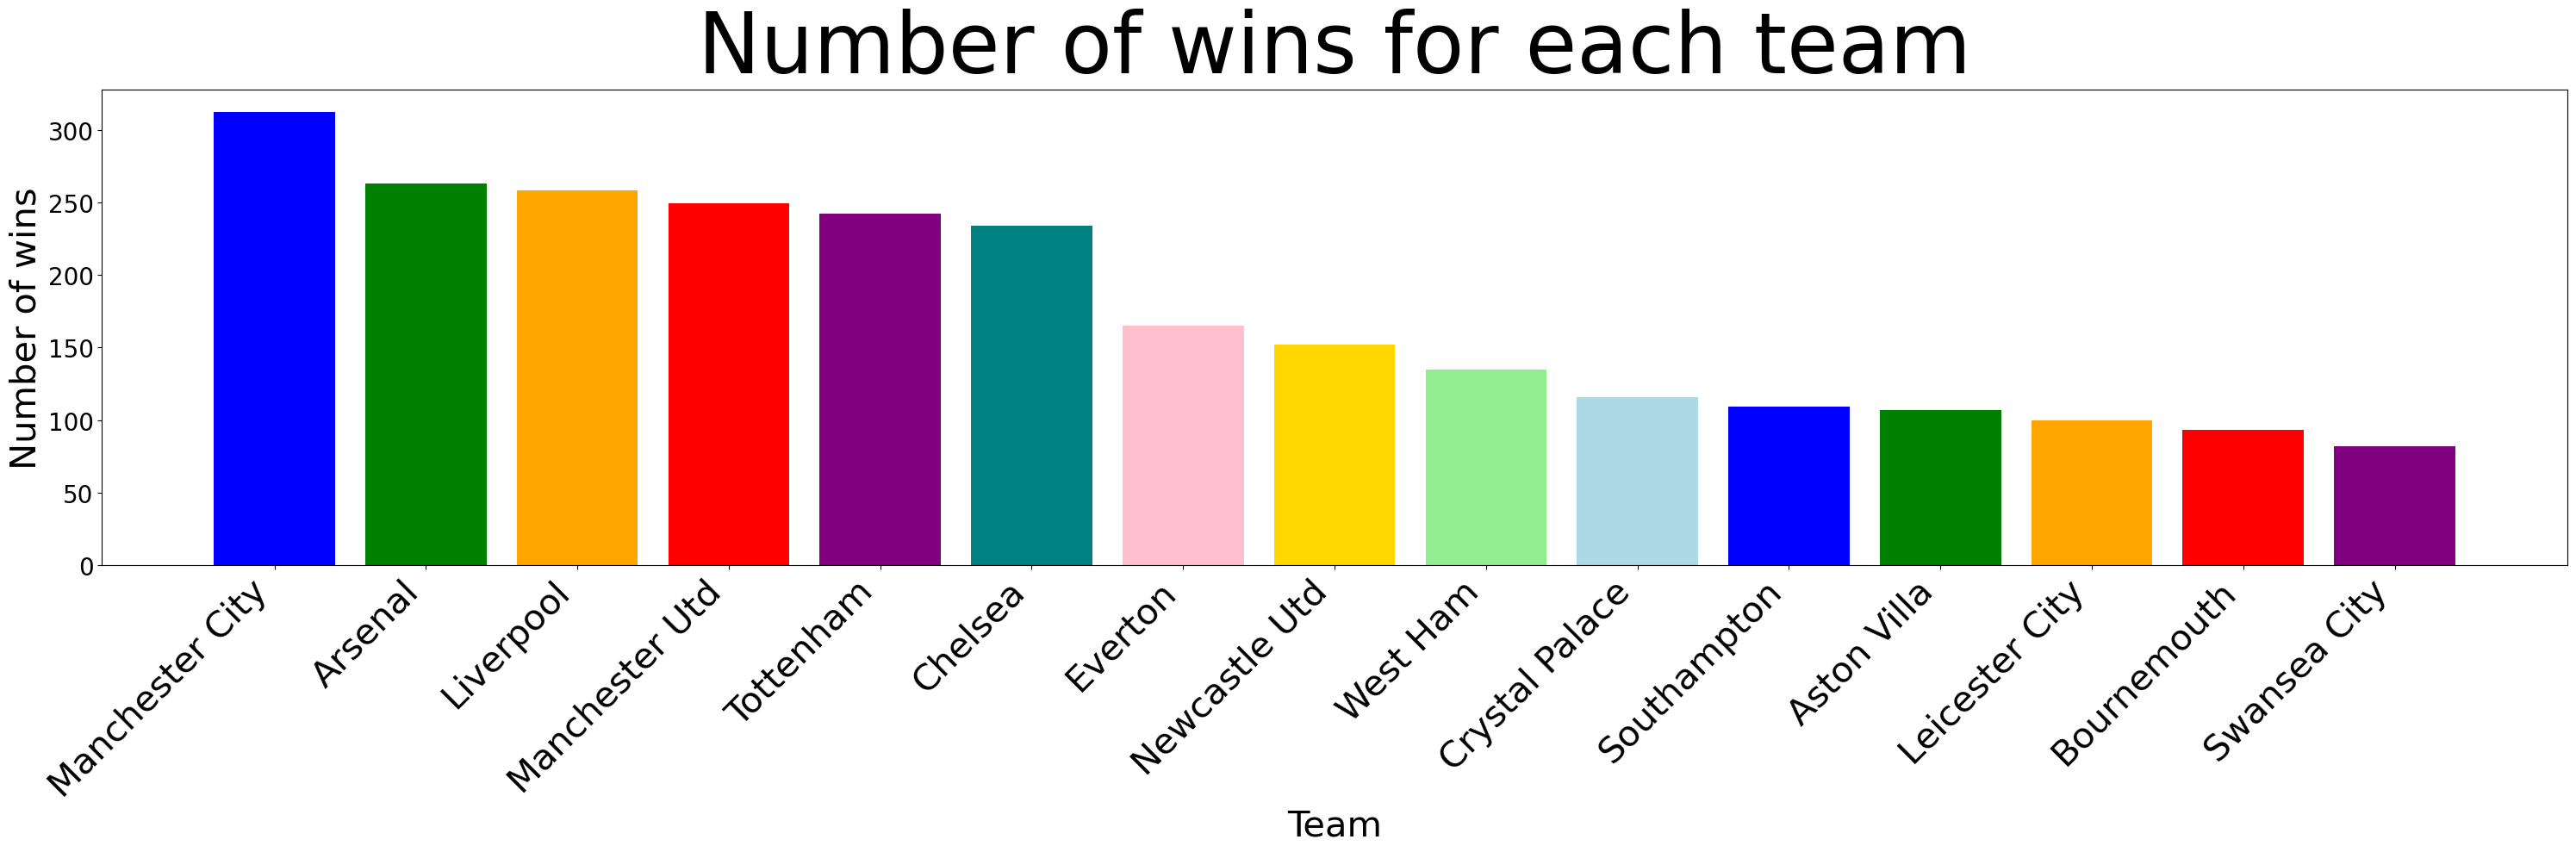

In [119]:
plt.figure(figsize=(30, 10))
plt.bar(winners['Team'].value_counts().index[:15], winners['Team'].value_counts().values[:15], color=['blue', 'green', 'orange', 'red', 'purple', 'teal', 'pink', 'gold', 'lightgreen', 'lightblue'])
plt.xlabel("Team", fontsize = 30)
plt.ylabel("Number of wins", fontsize = 30)
plt.title("Number of wins for each team", fontsize = 70)
plt.xticks(rotation=45, ha="right" , fontsize = 30)
plt.yticks(fontsize = 20)
plt.tight_layout()

plt.show()